## LOR-Räume in Berlin (probably not needed since RBS are the correct level)

The next chunk plots an overview of important geographic levels within Berlin.

* Bezirke are the city districts. There are 12 districts in total, and they are roughly equal to the voting districts in Berlin (although there are minor differences, some streets/blocks from one city district belong to another voting district).
* The next tree levels are sublevels, all belonging to the "Lebensweltlich organisierte Räume", trying to divide the city into societally homogenous entities: 
    * Prognoseräume are the largest level, separating the city in 58 districts with (on average) 60,000 residents
    * Bezirksregionen are the middle level, separating the city in 143 districts with (on average) 25,000 residents
    *  Planungsräume are the most granular level, separating the city in 542 districts with (on average) 7,500 residents

In the code chunk below, these four levels of geogrpahic representation are plotted. 

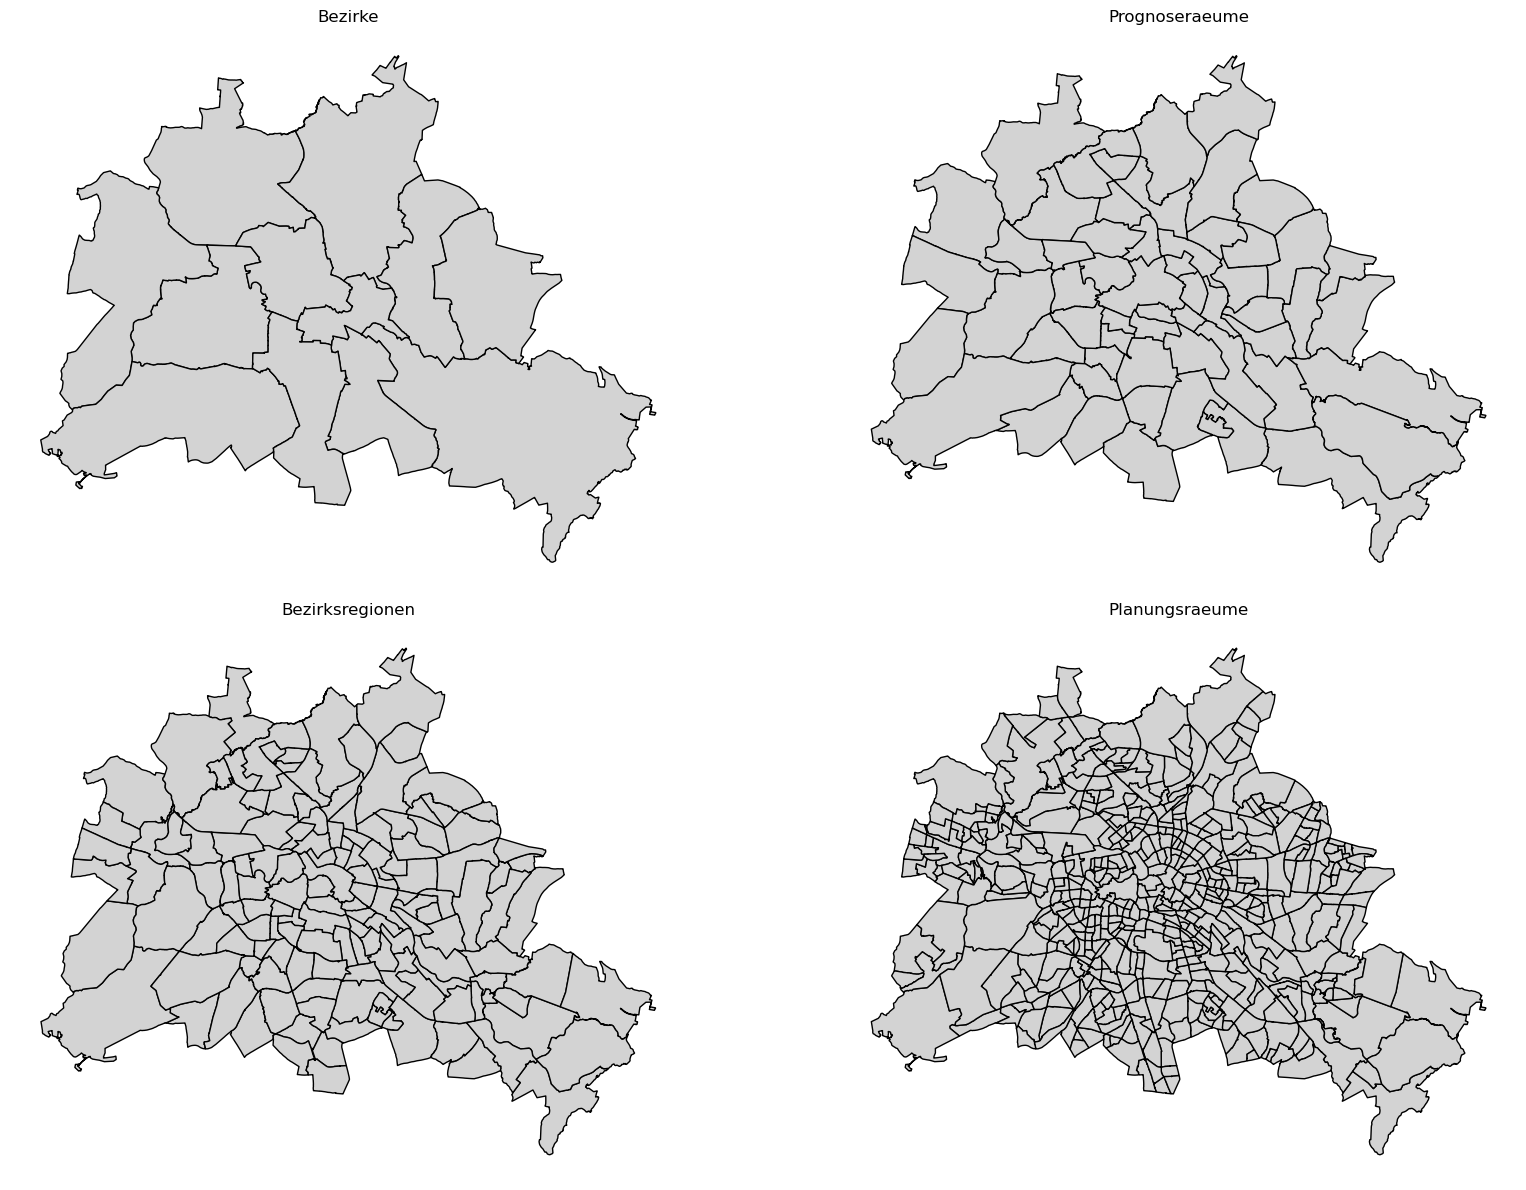

In [ ]:
bezirke_path = "Data sources/bezirke/bezirksgrenzen.shp"
prognoseraeume_path = "Data sources/Berlin LOR-Räume/LOR_Räume_2021/lor_prognoseraeume_2021.shp/lor_prognoseraeume_2021.shp"
bezirksregionen_path = "Data sources/Berlin LOR-Räume/LOR_Räume_2021/lor_bezirksregionen_2021.shp/lor_bezirksregionen_2021.shp"
planungsraeume_path = "Data sources/Berlin LOR-Räume/LOR_Räume_2021/lor_planungsraeume_2021.shp/lor_planungsraeume_2021.shp"

bezirke = gpd.read_file(bezirke_path)
prognoseraeume = gpd.read_file(prognoseraeume_path)
bezirksregionen = gpd.read_file(bezirksregionen_path)
planungsraeume = gpd.read_file(planungsraeume_path)

fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={'width_ratios': [2, 2], 'height_ratios': [2, 2]})

# Plot Bezirke
bezirke.plot(ax=axes[0, 0], color='lightgray', edgecolor='black')
axes[0, 0].set_title('Bezirke')
axes[0, 0].set_axis_off() 

# Plot Prognoseraeume
prognoseraeume.plot(ax=axes[0, 1], color='lightgray', edgecolor='black')
axes[0, 1].set_title('Prognoseraeume')
axes[0, 1].set_axis_off() 

# Plot Bezirksregionen
bezirksregionen.plot(ax=axes[1, 0], color='lightgray', edgecolor='black')
axes[1, 0].set_title('Bezirksregionen')
axes[1, 0].set_axis_off() 

# Plot Planungsraeume
planungsraeume.plot(ax=axes[1, 1], color='lightgray', edgecolor='black')
axes[1, 1].set_title('Planungsraeume')
axes[1, 1].set_axis_off() 


plt.tight_layout()
plt.show()


## Calculating the proportion of foreigners in each city district (Bezirk)

In [ ]:
# In this chunk, I am importing two data sets: ewr_total contains inormation on the number of residents for all levels down to the Planungsräume. ewr_foreigners contains the number of foreigners for the same geographic entities. 

ewr_total = pd.read_csv("Data sources/Berlin LOR-Räume/ewr_total.csv", sep=";")
ewr_foreigners = pd.read_csv("Data sources/Berlin LOR-Räume/ewr_auslaender.csv", sep=";")

ewr_foreigners.head()
ewr_total.head()

,ZEIT,RAUMID,BEZ,PGR,BZR,PLR,STADTRAUM,E_E,E_EM,E_EW,...,E_E95_110,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,E_E65U80,E_E80U110
0,202012,1011101,1,1,11,1,1,3419,1796,1623,...,6,22,134,143,28,256,1708,377,535,216
1,202012,1011102,1,1,11,2,1,192,121,71,...,0,0,6,6,4,13,99,36,19,9
2,202012,1011103,1,1,11,3,1,5211,2783,2428,...,24,39,225,306,102,417,2403,740,716,263
3,202012,1011104,1,1,11,4,1,4636,2563,2073,...,3,40,216,410,112,528,2464,500,303,63
4,202012,1011105,1,1,11,5,1,1599,882,717,...,0,16,76,88,43,92,883,204,148,49


In [ ]:
# Next, based on the unique identifier "RAUMID", I am merging the total resident numbers with the number of foreigners. This will enable me to calculate the proportion of foreigners on each geographical level. 

# Set 'RAUMID' as the index for both DataFrames
ewr_total = ewr_total.set_index('RAUMID')
ewr_foreigners = ewr_foreigners.set_index('RAUMID')

# Combine the DataFrames using combine_first
merged_ewr = ewr_total.combine_first(ewr_foreigners)

# Reset 'RAUMID' as a regular column
merged_ewr = merged_ewr.reset_index()

# Display the merged dataset
print(merged_ewr.head())

    RAUMID  BEZ  BZR   E_A  E_A00_01  E_A01_02  E_A02_03  E_A03_05  E_A05_06  \
0  1011101    1   11  1387         3         3         9        14         9   
1  1011102    1   11    73         0         0         3         0         0   
2  1011103    1   11  1853         0        16         9        19         6   
3  1011104    1   11  1787        10         9         6        19        12   
4  1011105    1   11   836        10         6         3        15         8   

   E_A06_07  ...  E_E85_90  E_E90_95  E_E95_110  E_EM  E_EU1  E_EW  PGR  PLR  \
0         3  ...        51        18          6  1796     22  1623    1    1   
1         0  ...         0         0          0   121      0    71    1    2   
2         3  ...        63        30         24  2783     39  2428    1    3   
3        14  ...        18        12          3  2563     40  2073    1    4   
4         9  ...        12         6          0   882     16   717    1    5   

   STADTRAUM    ZEIT  
0          1  2

In [ ]:
# Calculate foreigners proportion in each row
merged_ewr["foreigners_proportion"] = merged_ewr["E_A"] / merged_ewr["E_E"]

In [ ]:
# Here, I am calculating the proportion of foreigners in each Bezirk (city district). The column E_E includes the total number of residents, the column E_A includes the total number of foreign residents.

# Calculate the total foreigners and total population for each 'BEZ'
grouped_ewr = merged_ewr.groupby('BEZ').agg({'E_A': 'sum', 'E_E': 'sum'})

# Calculate the proportion of foreigners for each 'BEZ'
grouped_ewr['foreigners_proportion'] = grouped_ewr['E_A'] / grouped_ewr['E_E']

# Display the result
print(grouped_ewr[['foreigners_proportion']])

     foreigners_proportion
BEZ                       
1                 0.341327
2                 0.280768
3                 0.148889
4                 0.254490
5                 0.211769
6                 0.154582
7                 0.206203
8                 0.261032
9                 0.109449
10                0.125850
11                0.185998
12                0.193625


In [ ]:
# Adding the foreigners proportion to the shapefile of city districts, using Gemeinde_s and BEZ as merging keys (both resemble the district number)

# Convert 'Gemeinde_s' column to int64 in bezirke
bezirke['Gemeinde_s'] = bezirke['Gemeinde_s'].astype(int)

# Merge bezirke with grouped_ewr
merged_data = pd.merge(bezirke, grouped_ewr, left_on='Gemeinde_s', right_on='BEZ', how='left')

# Print the merged data
print(merged_data)

                         gml_id                  Gemeinde_n  Gemeinde_s  \
0    s_wfs_alkis_bezirk.F176__1               Reinickendorf          12   
1    s_wfs_alkis_bezirk.F176__2  Charlottenburg-Wilmersdorf           4   
2    s_wfs_alkis_bezirk.F176__3            Treptow-Köpenick           9   
3    s_wfs_alkis_bezirk.F176__4                      Pankow           3   
4    s_wfs_alkis_bezirk.F176__5                    Neukölln           8   
5    s_wfs_alkis_bezirk.F176__6                 Lichtenberg          11   
6    s_wfs_alkis_bezirk.F176__7         Marzahn-Hellersdorf          10   
7    s_wfs_alkis_bezirk.F176__8                     Spandau           5   
8    s_wfs_alkis_bezirk.F176__9         Steglitz-Zehlendorf           6   
9   s_wfs_alkis_bezirk.F176__10                       Mitte           1   
10  s_wfs_alkis_bezirk.F176__11    Friedrichshain-Kreuzberg           2   
11  s_wfs_alkis_bezirk.F176__12        Tempelhof-Schöneberg           7   

   Land_name Land_schlu 

In [ ]:
# We can now plot an interactive map of the city districts and color them according to the proportion of foreigner in each Bezirk. 


# Create an interactive map with Plotly Express
fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='foreigners_proportion',
    color_continuous_scale='reds',  # Change the color scale
    hover_name='Gemeinde_n',  # Display Gemeinde name on hover
    hover_data={'foreigners_proportion': ':.2f'},
    mapbox_style="carto-positron",
    center={"lat": 52.5200, "lon": 13.4050},  # Centered on Berlin
    zoom=9,
    opacity=0.7,
    range_color=[0, max(merged_data['foreigners_proportion'])],
)

# Update layout for better readability
fig.update_layout(
    title_text='Bezirke Map with Foreigners Proportion',
    margin=dict(l=0, r=0, b=0, t=50),
    coloraxis_colorbar=dict(title='Foreigners Proportion'),
)

# Display the interactive map
fig.show()



/var/folders/yz/j2f_2fj52f1dq645xw5z31lm0000gn/T/ipykernel_7185/2752747597.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




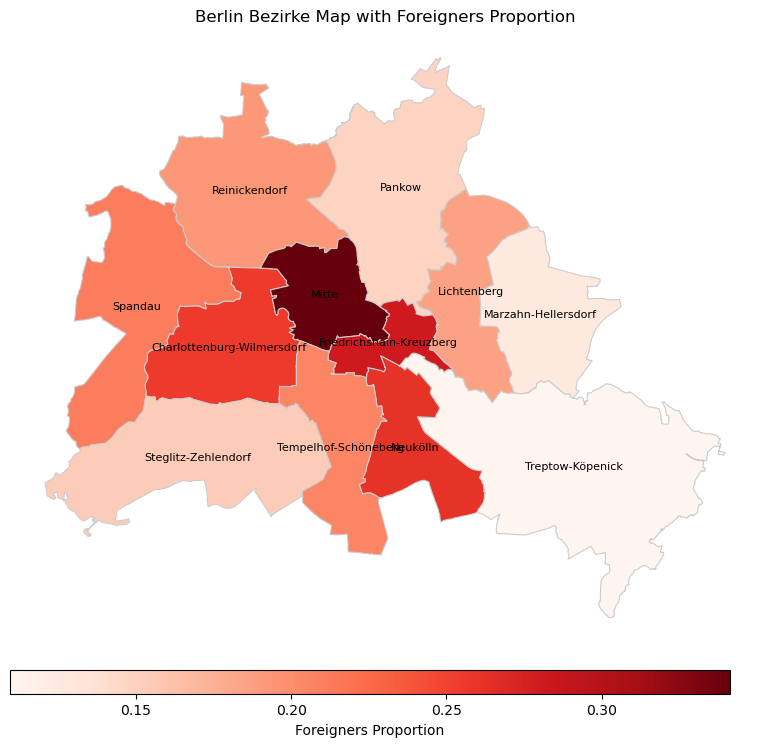

In [ ]:
# Plot the map without axes, labels, and box
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Plot Bezirke with colored polygons
plot = merged_data.plot(column='foreigners_proportion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Label Gemeinde names
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Gemeinde_n']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Set title
ax.set_title('Berlin Bezirke Map with Foreigners Proportion', fontsize=12)

# Create colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=merged_data['foreigners_proportion'].min(), vmax=merged_data['foreigners_proportion'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Foreigners Proportion')

# Display the map
plt.show()


## Visualizing proportions in PLR

In [ ]:
merged_ewr.columns

Index(['RAUMID', 'BEZ', 'BZR', 'E_A', 'E_A00_01', 'E_A01_02', 'E_A02_03',
       'E_A03_05', 'E_A05_06', 'E_A06_07', 'E_A07_08', 'E_A08_10', 'E_A10_12',
       'E_A12_14', 'E_A14_15', 'E_A15U18', 'E_A15_18', 'E_A18U25', 'E_A18_21',
       'E_A1U6', 'E_A21_25', 'E_A25U55', 'E_A25_27', 'E_A27_30', 'E_A30_35',
       'E_A35_40', 'E_A40_45', 'E_A45_50', 'E_A50_55', 'E_A55U65', 'E_A55_60',
       'E_A60_63', 'E_A63_65', 'E_A65U80', 'E_A65_67', 'E_A67_70', 'E_A6U15',
       'E_A70_75', 'E_A75_80', 'E_A80U110', 'E_A80_85', 'E_A85_90', 'E_A90_95',
       'E_A95_110', 'E_AM', 'E_AU1', 'E_AW', 'E_E', 'E_E00_01', 'E_E01_02',
       'E_E02_03', 'E_E03_05', 'E_E05_06', 'E_E06_07', 'E_E07_08', 'E_E08_10',
       'E_E10_12', 'E_E12_14', 'E_E14_15', 'E_E15U18', 'E_E15_18', 'E_E18U25',
       'E_E18_21', 'E_E1U6', 'E_E21_25', 'E_E25U55', 'E_E25_27', 'E_E27_30',
       'E_E30_35', 'E_E35_40', 'E_E40_45', 'E_E45_50', 'E_E50_55', 'E_E55U65',
       'E_E55_60', 'E_E60_63', 'E_E63_65', 'E_E65U80', 'E_E65_67

In [ ]:
# Convert the 'broker Dow' column in planungsraeume to the same data type as 'RAUMID' in merged_ewr
planungsraeume['PLR_ID'] = planungsraeume['PLR_ID'].astype(int)

# Assuming merged_ewr and planungsraeume are your DataFrames
planungsraeume = pd.merge(planungsraeume, merged_ewr[['RAUMID', 'foreigners_proportion']], left_on='PLR_ID', right_on='RAUMID', how='left')

# Drop the redundant RAUMID column
planungsraeume = planungsraeume.drop(columns='RAUMID')

In [ ]:
# Plot the map without axes, labels, and box
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axis_off()

# Plot Bezirke with colored polygons
plot = planungsraeume.plot(column='foreigners_proportion', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)


# Set title
ax.set_title('Berlin Bezirke Map with Foreigners Proportion', fontsize=12)

# Create colorbar
cax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # Adjust these values to position the colorbar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=planungsraeume['foreigners_proportion'].min(), vmax=merged_data['foreigners_proportion'].max()))
sm._A = []  # fake up the array of the scalar mappable
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Foreigners Proportion')

# Display the map
plt.show()

# Daten Wahlkreise Bundeswahlleiter

In [ ]:
# Reading in data and adding geoemtry

population2023 = pd.read_excel("Data sources/Bundeswahlleiter/bevlkerung-d-nd-wahlkreise20dbt-20230630.xlsx", skiprows=9, names=["Land", "WKR_NR", "Name", "footnote", "Deutsch", "Nichtdeutsch"])

population2023 = pd.merge(population2023, wahlkreise_germany[['WKR_NR', 'geometry']], left_on='WKR_NR', right_on='WKR_NR', how='left')

# Creating new column with foreigner share

population2023['foreigner_share'] = population2023['Nichtdeutsch']/population2023['Deutsch']
filtered_population = population2023[population2023['footnote'].isna()]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(filtered_population, geometry='geometry')

# Create a column for color based on 'footnote' column
gdf['color'] = 'grey'  # Default color is grey
gdf.loc[gdf['footnote'].isna(), 'color'] = gdf.loc[gdf['footnote'].isna(), 'foreigner_share']

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='color', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot (add title, legend, etc.)
plt.title('Districts Colored by Foreigner Share (Grey for Footnote Not NA)')
plt.legend()
plt.show()
